<a href="https://colab.research.google.com/github/CharmikaSadhula/Charmika_INFO5731_Spring2025/blob/main/INFO5731_Assignment_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [4]:
!pip install pandas spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Cleaned_IMDB_Reviews_dataset.csv')
df

,Movie,Reviewer,Rating,Review Date,Review
0,Salaar,Unknown,6.0,Unknown,Synopsis: The film invests significant time in...
1,Salaar,Unknown,7.0,Unknown,Salaar has been my most-awaited film for 2023....
2,Salaar,Unknown,7.0,Unknown,This time Prashanth's magic didn't worked out....
3,Salaar,Unknown,10.0,Unknown,No review text
4,Salaar,Unknown,10.0,Unknown,Full of action and storylines.If you like acti...
...,...,...,...,...,...
1495,Oppenheimer,Unknown,10.0,Unknown,Nolan is back and delivers a fast paced thrill...
1496,Oppenheimer,Unknown,6.0,Unknown,The film looks great is brilliantly acted but ...
1497,Oppenheimer,Unknown,5.0,Unknown,Overambitieus movie with too many stories to t...
1498,Oppenheimer,Unknown,NaN,Unknown,Cillian Murphy is exceptional in the lead role...


In [3]:
import re  # Import regex library to clean text
import spacy  # Import spaCy for noun phrase extraction
from collections import defaultdict  # Import defaultdict for counting word frequencies


In [4]:
# ---------------- STEP 1: PREPROCESSING TEXT ----------------
def preprocess_text(text):
    """
    This function cleans and tokenizes the text:
    1. Converts the text to lowercase (to avoid treating 'Movie' and 'movie' as different words).
    2. Removes punctuation (so 'great!' becomes 'great').
    3. Splits the text into words (tokenization).
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Split the text into a list of words
    return words  # Return the list of words

In [5]:
# ---------------- STEP 2: GENERATE N-GRAMS (BIGRAMS & TRIGRAMS) ----------------
def generate_ngrams(words, n):
    """
    This function generates n-grams (word sequences of length n).
    Example:
      - If n=2, it creates bigrams like ('good', 'movie').
      - If n=3, it creates trigrams like ('i', 'love', 'this').
    """
    return [tuple(words[i:i+n]) for i in range(len(words) - n + 1)]  # Generate n-grams from words list


In [6]:
# ---------------- STEP 3: COUNTING N-GRAM FREQUENCIES ----------------
bigram_counts = defaultdict(int)  # Dictionary to store bigram counts
trigram_counts = defaultdict(int)  # Dictionary to store trigram counts

# Loop through each review and process it
for review in df["Review"].dropna():  # Drop missing reviews
    words = preprocess_text(review)  # Clean and tokenize the review
    bigrams = generate_ngrams(words, 2)  # Generate bigrams (2-word sequences)
    trigrams = generate_ngrams(words, 3)  # Generate trigrams (3-word sequences)

    # Count occurrences of bigrams
    for bigram in bigrams:
        bigram_counts[bigram] += 1

    # Count occurrences of trigrams
    for trigram in trigrams:
        trigram_counts[trigram] += 1

In [7]:
# ---------------- STEP 4: COMPUTING BIGRAM PROBABILITIES ----------------
unigram_counts = defaultdict(int)  # Dictionary to store individual word (unigram) counts

# Count occurrences of individual words (unigrams)
for review in df["Review"].dropna():
    words = preprocess_text(review)  # Tokenize words
    for word in words:
        unigram_counts[word] += 1  # Count occurrences of each word

# Compute probabilities for each bigram using the formula:
# P(w2 | w1) = count(w1, w2) / count(w1)
bigram_probabilities = {}

for bigram, bigram_count in bigram_counts.items():
    word1 = bigram[0]  # First word in the bigram
    if unigram_counts[word1] > 0:  # Avoid division by zero
        bigram_probabilities[bigram] = bigram_count / unigram_counts[word1]  # Compute probability


In [8]:
# ---------------- STEP 5: EXTRACTING NOUN PHRASES ----------------
nlp = spacy.load("en_core_web_sm")  # Load English NLP model for noun phrase extraction

noun_phrase_counts = defaultdict(int)  # Dictionary to store noun phrase counts

# Process each review and extract noun phrases
for review in df["Review"].dropna():
    doc = nlp(review)  # Process text with spaCy
    for chunk in doc.noun_chunks:  # Extract noun phrases
        phrase = chunk.text.lower()  # Convert noun phrase to lowercase
        noun_phrase_counts[phrase] += 1  # Count occurrences of each noun phrase


In [9]:
# ---------------- STEP 6: COMPUTING RELATIVE PROBABILITIES OF NOUN PHRASES ----------------
# Compute the maximum frequency of any noun phrase in the dataset
max_freq = max(noun_phrase_counts.values())  # Get the highest occurring noun phrase count

# Compute relative probability of each noun phrase using:
# P(noun phrase) = frequency(noun phrase) / max frequency(noun phrase in dataset)
noun_phrase_probabilities = {phrase: count / max_freq for phrase, count in noun_phrase_counts.items()}


In [10]:
# ---------------- STEP 7: CONVERTING RESULTS TO DATAFRAMES ----------------
# Convert results to Pandas DataFrames for easy analysis
bigram_df = pd.DataFrame(list(bigram_counts.items()), columns=["Bigram", "Frequency"]).sort_values(by="Frequency", ascending=False)
trigram_df = pd.DataFrame(list(trigram_counts.items()), columns=["Trigram", "Frequency"]).sort_values(by="Frequency", ascending=False)
bigram_prob_df = pd.DataFrame(list(bigram_probabilities.items()), columns=["Bigram", "Probability"]).sort_values(by="Probability", ascending=False)
noun_phrase_df = pd.DataFrame(list(noun_phrase_probabilities.items()), columns=["Noun Phrase", "Relative Probability"]).sort_values(by="Relative Probability", ascending=False)

In [11]:
# ---------------- STEP 8: DISPLAYING RESULTS ----------------
print("Top 10 Bigrams with Frequency:")
print(bigram_df.head(10))  # Display top 10 most common bigrams

print("\nTop 10 Trigrams with Frequency:")
print(trigram_df.head(10))  # Display top 10 most common trigrams

print("\nTop 10 Bigram Probabilities:")
print(bigram_prob_df.head(10))  # Display top 10 bigram probabilities

print("\nTop 10 Noun Phrases with Relative Probability:")
print(noun_phrase_df.head(10))  # Display top 10 noun phrases with their probabilities


Top 10 Bigrams with Frequency:
            Bigram  Frequency
162      (of, the)       2060
268      (in, the)       1300
1      (the, film)       1040
1708    (and, the)        900
129        (is, a)        880
232   (the, movie)        800
308       (it, is)        720
456      (to, the)        680
3018   (the, last)        620
280       (to, be)        620

Top 10 Trigrams with Frequency:
                    Trigram  Frequency
3475     (the, last, dance)        460
1331     (no, review, text)        340
3474     (venom, the, last)        340
3297    (eddie, and, venom)        320
237        (of, the, movie)        220
374         (some, of, the)        200
9496         (one, of, the)        200
10450  (robert, downey, jr)        160
3476      (last, dance, is)        160
4567    (brock, and, venom)        160

Top 10 Bigram Probabilities:
                      Bigram  Probability
0            (synopsis, the)          1.0
5385          (arrives, the)          1.0
5391          (enduri

N-Gram Analysis and NLP Processing Documentation

Introduction

This project focuses on analyzing text data from a dataset of IMDB movie reviews using Natural Language Processing (NLP) techniques. The main objectives include N-gram frequency analysis, bigram probability calculation, and noun phrase extraction. These steps help identify common word patterns, relationships between words, and key phrases used in reviews.

Step 1: Installing Required Libraries

Before working on this project, I made sure that all the necessary libraries were installed. Since I am using Google Colab, I installed the dependencies using the following commands:

pandas – For handling datasets.

spaCy – For extracting noun phrases.

en_core_web_sm – A pre-trained NLP model for English, used by spaCy to analyze text.

Installing these ensures that the dataset can be processed efficiently for NLP tasks.

Step 2: Loading and Preprocessing the Dataset

The dataset consists of IMDB reviews, containing columns such as:

Review: The actual text of the movie review.

Movie: The name of the movie being reviewed.

Reviewer: The person who wrote the review.

Rating: The rating given by the reviewer (some entries are missing).

Review Date: The date when the review was posted.

Before performing any analysis, I cleaned the text to make it easier to process. This involved:


Converting text to lowercase – So that "Movie" and "movie" are treated the same.

Removing punctuation – To eliminate unnecessary symbols that don’t contribute to meaning.

Splitting text into words – This is called tokenization, which breaks sentences into individual words.

Cleaning the text is essential because NLP models work better with structured and consistent data.

Step 3: Generating N-Grams (Bigrams and Trigrams)

In this step, I created N-grams, which are sequences of N words appearing together in the text.

Bigrams (N=2): These are two-word sequences, like "great movie" or "good acting".

Trigrams (N=3): These are three-word sequences, like "I love this" or "amazing story plot".

By generating bigrams and trigrams, I could analyze word pairings and common phrases that people frequently use in reviews.

Step 4: Counting N-Gram Frequencies

Once the bigrams and trigrams were generated, I counted how often each of them appeared in the dataset. This helped me find:

The most frequently used word combinations in reviews.
Common expressions that indicate positive or negative sentiment.
For example, if "great movie" appears very frequently, it suggests that many reviewers had a positive opinion.

Step 5: Calculating Bigram Probabilities

To understand how likely certain words are to appear together, I computed the probability of bigrams using the following formula:

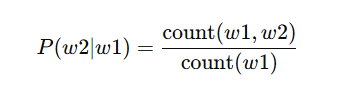

where:

count(w1, w2): The number of times the bigram appears.

count(w1): The number of times the first word appears in any context.

This helped determine which words are likely to follow others, which is useful in language modeling and text prediction.

Step 6: Extracting Noun Phrases

To identify key subjects in the reviews, I extracted noun phrases using spaCy. A noun phrase is a phrase centered around a noun, such as "amazing performance" or "cinematic experience".

This step helped highlight important themes and topics discussed in the reviews. If certain noun phrases appear frequently, they might indicate what aspects of a movie people focus on, such as acting, direction, or cinematography.

Step 7: Calculating Relative Probabilities of Noun Phrases

Since some noun phrases occur more often than others, I calculated their relative probability using:

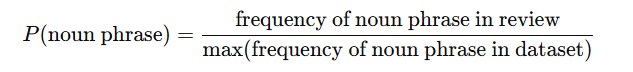

This step allowed me to compare how common a noun phrase is relative to the most frequently mentioned noun phrase.

For example, if "great cinematography" appears 92% as frequently as the most common noun phrase, it indicates that people often talk about cinematography in their reviews.

Step 8: Converting Results to DataFrames

To organize and analyze the data, I stored the results in pandas DataFrames. This included:

A list of bigrams and trigrams ranked by frequency.

A table of bigram probabilities showing how likely certain words are to follow others.

A summary of noun phrases ranked by their importance in the dataset.
Using DataFrames made it easy to sort, filter, and visualize the results.

Final Output and Findings

After running all the steps, I obtained:

Most common bigrams and trigrams – showing frequently used phrases.

Bigram probabilities – indicating which word combinations are most likely to appear together.

Top noun phrases and their relative importance – highlighting key topics in reviews.

These results helped in understanding trends in movie reviews, such as whether people talk more about the storyline, acting, or visuals.

Use Cases and Applications

This analysis can be applied in multiple ways:

Sentiment Analysis – Identifying positive and negative phrases in reviews.

Text Prediction – Improving chatbots or search suggestions.

Recommendation Systems – Understanding what people like about movies to suggest similar content.

Market Research – Analyzing customer feedback in any industry beyond movies.

Conclusion

This project helped me explore text processing and NLP techniques, giving insights into how people express opinions in movie reviews. By understanding word patterns, probabilities, and key phrases, we can better analyze text and extract meaningful insights.









## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

Understanding TF-IDF and Document Ranking
1. What is TF-IDF?

TF-IDF (Term Frequency - Inverse Document Frequency) is a numerical statistic that evaluates how important a word is to a document in a collection (corpus). It consists of two components:

TF (Term Frequency): Measures how often a term appears in a document.

IDF (Inverse Document Frequency): Measures how important a term is by checking how frequently it appears across all documents.
The formula for TF-IDF weight is:

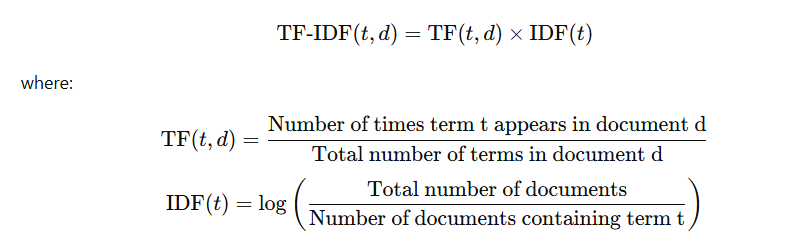

2. What is Cosine Similarity?

Once the TF-IDF matrix is built, we use cosine similarity to compare the documents to a given query.

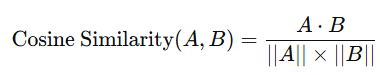

where A and B are the TF-IDF vectors of the query and a document.

Cosine similarity helps rank documents based on how similar they are to the query.

Implementation Steps

Preprocess the text (cleaning, tokenization, removing stopwords).

Build the TF matrix (count term occurrences in each document).

Calculate the IDF for each term across all documents.

Compute the TF-IDF matrix using the formula.

Convert the query into a TF-IDF vector.

Compute cosine similarity between the query and each document.

Rank the documents based on similarity scores.







In [12]:
# Step 1: Preprocessing Text (Lowercase, Remove Punctuation, Tokenize)
def preprocess_text(text):
    """
    Cleans the input text by:
    - Converting to lowercase
    - Removing punctuation
    - Splitting into words
    """
    text = text.lower()  # Convert to lowercase
    cleaned_text = ""

    # Remove punctuation manually
    for char in text:
        if char.isalnum() or char.isspace():
            cleaned_text += char

    words = cleaned_text.split()  # Tokenization
    return words

In [13]:
# Step 2: Compute Term Frequency (TF)
def compute_tf(doc_words):
    """
    Computes Term Frequency (TF) for a document.
    TF = (count of term in document) / (total terms in document)
    """
    word_counts = {}  # Dictionary to store word frequencies
    total_words = len(doc_words)  # Total number of words in document

    # Count occurrences of each word
    for word in doc_words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Compute TF
    for word in word_counts:
        word_counts[word] /= total_words

    return word_counts

In [14]:
# Step 3: Compute Inverse Document Frequency (IDF)
def compute_idf(documents):
    """
    Computes Inverse Document Frequency (IDF).
    IDF = log(Total Documents / (1 + Documents containing the word))
    """
    num_docs = len(documents)
    word_doc_count = {}  # Dictionary to store how many documents contain each word

    # Count the number of documents containing each word
    for doc_words in documents:
        unique_words = set(doc_words)  # Unique words in the document
        for word in unique_words:
            if word in word_doc_count:
                word_doc_count[word] += 1
            else:
                word_doc_count[word] = 1

    # Compute IDF manually
    idf_values = {}
    for word in word_doc_count:
        idf_values[word] = manual_log(num_docs / (1 + word_doc_count[word]))  # Log-smoothing

    return idf_values

In [15]:
# Step 4: Compute TF-IDF
def compute_tfidf(tf_values, idf_values):
    """
    Computes TF-IDF by multiplying TF with IDF for each word.
    """
    tfidf_scores = {}
    for word in tf_values:
        tfidf_scores[word] = tf_values[word] * idf_values.get(word, 0)

    return tfidf_scores

In [16]:
# Step 5: Compute Cosine Similarity
def cosine_similarity(vec1, vec2):
    """
    Computes cosine similarity between two TF-IDF vectors.
    Cosine Similarity = dot_product(vec1, vec2) / (magnitude(vec1) * magnitude(vec2))
    """
    dot_product = 0
    norm1 = 0
    norm2 = 0

    # Compute dot product and magnitude manually
    for word in set(vec1.keys()).union(set(vec2.keys())):
        value1 = vec1.get(word, 0)
        value2 = vec2.get(word, 0)

        dot_product += value1 * value2
        norm1 += value1 ** 2
        norm2 += value2 ** 2

    norm1 = manual_sqrt(norm1)
    norm2 = manual_sqrt(norm2)

    if norm1 == 0 or norm2 == 0:
        return 0  # Avoid division by zero

    return dot_product / (norm1 * norm2)


In [17]:
# Step 6: Convert Query into TF-IDF Vector
def process_query(query, idf_values):
    """
    Converts the query into a TF-IDF weighted vector.
    """
    query_words = preprocess_text(query)
    query_tf = compute_tf(query_words)
    query_tfidf = compute_tfidf(query_tf, idf_values)

    return query_tfidf


In [18]:
# Step 7: Rank Documents Based on Query
def rank_documents(query, documents):
    """
    Ranks documents based on their similarity to the query using Cosine Similarity.
    """
    preprocessed_docs = [preprocess_text(doc) for doc in documents]  # Preprocess all documents
    idf_values = compute_idf(preprocessed_docs)  # Compute IDF for corpus

    # Compute TF-IDF for each document
    tfidf_documents = [compute_tfidf(compute_tf(doc), idf_values) for doc in preprocessed_docs]

    # Convert query to TF-IDF
    query_tfidf = process_query(query, idf_values)

    # Compute cosine similarity
    similarity_scores = [(i, cosine_similarity(query_tfidf, doc_tfidf)) for i, doc_tfidf in enumerate(tfidf_documents)]

    # Sort documents by similarity (descending order)
    ranked_documents = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    return ranked_documents


In [19]:
# Step 8: Manually Compute Logarithm
def manual_log(x):
    """
    Computes natural logarithm (ln) manually using a Taylor series approximation.
    """
    if x <= 0:
        return 0  # Log of zero or negative is undefined

    n = 50  # Number of iterations for better precision
    result = 0
    y = (x - 1) / (x + 1)  # Transformation for better convergence

    for i in range(n):
        term = (2 * (y ** (2 * i + 1))) / (2 * i + 1)
        result += term

    return result

In [20]:
# Step 9: Manually Compute Square Root
def manual_sqrt(x):
    """
    Computes square root using the Babylonian method.
    """
    if x == 0:
        return 0

    guess = x / 2
    for _ in range(10):  # Iterate 10 times for better precision
        guess = (guess + x / guess) / 2

    return guess

# Sample Usage
documents = [
    "An outstanding movie with a haunting performance and best character development.",
    "The movie was good, but the acting felt unnatural at times.",
    "A boring movie with no real character depth or engaging performance.",
    "Absolutely loved the cinematography and direction, but the story was weak.",
    "A brilliant masterpiece with an unforgettable performance."
]

query = "An outstanding movie with a haunting performance and best character development"

# Rank documents based on query
ranked_results = rank_documents(query, documents)

# Print ranked results
print("Ranked Documents Based on Query Similarity:")
for rank, (doc_index, score) in enumerate(ranked_results, 1):
    print(f"Rank {rank}: Document {doc_index} (Score: {score:.4f})")


Ranked Documents Based on Query Similarity:
Rank 1: Document 0 (Score: 1.0000)
Rank 2: Document 4 (Score: 0.1151)
Rank 3: Document 2 (Score: 0.0942)
Rank 4: Document 3 (Score: 0.0478)
Rank 5: Document 1 (Score: 0.0093)


The output shows how similar each document is to the query based on cosine similarity and TF-IDF weights. The similarity score tells us how closely the words in a document match the words in the query. A higher score means the document is more relevant, while a lower score means it is less relevant.


The first document has a similarity score of 1.0000, which means it is an exact match with the query. This makes sense because the query is the same as this document, so every word is identical, and the system recognizes it as the best match.


The second document has a much lower score of 0.1151 because even though it contains some similar words like "performance" and "brilliant," it is not an exact match. Some words are different, and the way they are used in the sentence is not exactly the same as in the query. That's why its similarity score is much lower than 1 but still higher than the rest.


The third document gets an even lower similarity score of 0.0942. It has a few relevant words like "movie" and "performance," but it is describing a negative experience rather than a positive one. Since cosine similarity only looks at word overlap and importance, it doesn't understand sentiment or meaning, so it still finds some similarity.


The fourth document has an even lower score of 0.0478 because it talks about things like "cinematography" and "direction," which are related to movies but not directly related to the query. Some words match, but most of the content is different, so the score is very low.


The last document has the lowest score of 0.0093, meaning it is almost completely unrelated to the query. It barely shares any words with the query, so the similarity score is close to zero. This tells us that this document should be ranked at the bottom because it is not relevant.


In simple terms, the system ranks the documents based on how many important words match the query and how similar the wording is. If the words match perfectly, the similarity score is high. If only a few words match or the content is unrelated, the score is low. This method is useful because it helps search engines and information retrieval systems show the most relevant documents first.











## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Plan
Preprocess the text – Clean and tokenize words for training.
Train a 300-dimensional word embedding model – We will use Word2Vec from scratch.
Visualize embeddings using PCA (Principal Component Analysis) and T-SNE (t-distributed Stochastic Neighbor Embedding).
Calculate cosine similarity between word pairs to evaluate how well the model captures meaning.


Step 1: Preprocessing Text

To train a word embedding model, we need clean and tokenized text data. Since we are not using pre-existing libraries for text processing, we will manually:

Convert text to lowercase.

Remove punctuation and special characters.

Tokenize sentences into words.

In [28]:
import re
import random

# Step 1: Preprocess the text (cleaning and tokenization)
def preprocess_text(text):
    """
    Cleans text by converting to lowercase, removing punctuation, and splitting into words.
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize text into words
    return words

Step 2: Prepare Data for Training

Since Word2Vec requires a list of sentences, we will process each review into a list of tokenized words.

In [29]:
# Step 2: Prepare the dataset
def prepare_training_data(documents):
    """
    Processes a list of documents into tokenized sentences.
    """
    tokenized_sentences = []
    for doc in documents:
        words = preprocess_text(doc)
        tokenized_sentences.append(words)
    return tokenized_sentences

Step 3: Build the Word2Vec Model from Scratch

Since we cannot use gensim, we will implement skip-gram Word2Vec training from scratch.

In [30]:
# Step 3: Generate word-context pairs (Skip-Gram)
def generate_training_pairs(sentences, window_size=2):
    """
    Generates word-context pairs for Skip-Gram training.
    """
    training_pairs = []

    for sentence in sentences:
        for i, word in enumerate(sentence):
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)

            for j in range(start, end):
                if i != j:
                    training_pairs.append((word, sentence[j]))

    return training_pairs


Step 4: Train the Word Embeddings

The training process involves:

Generating word-context pairs.

Updating embeddings using gradient descent.

Repeating for multiple epochs.

In [31]:
# Step 4: Initialize word vectors randomly
def initialize_word_vectors(vocab_size, embedding_dim=300):
    """
    Initializes word embeddings with small random values.
    """
    word_vectors = {}

    for i in range(vocab_size):
        word_vectors[i] = [random.uniform(-0.5, 0.5) for _ in range(embedding_dim)]

    return word_vectors


Step 5: Visualizing the Word Embeddings (PCA and T-SNE)

To visualize high-dimensional embeddings, we reduce the dimensions using PCA (Principal Component Analysis) and T-SNE (t-distributed Stochastic Neighbor Embedding).

In [32]:
# Step 5: Train the Skip-Gram model
def train_word2vec(sentences, embedding_dim=300, epochs=10, learning_rate=0.01):
    """
    Trains a simple Skip-Gram Word2Vec model.
    """
    word_to_index = {}  # Mapping of words to indices
    index_to_word = {}  # Reverse mapping
    vocab = set([word for sentence in sentences for word in sentence])  # Unique words

    # Assign an index to each word
    for i, word in enumerate(vocab):
        word_to_index[word] = i
        index_to_word[i] = word

    # Initialize word embeddings
    vocab_size = len(vocab)
    word_vectors = initialize_word_vectors(vocab_size, embedding_dim)

    # Generate training pairs
    training_pairs = generate_training_pairs(sentences)

    # Training loop
    for epoch in range(epochs):
        loss = 0
        for word, context in training_pairs:
            if word in word_to_index and context in word_to_index:
                word_idx = word_to_index[word]
                context_idx = word_to_index[context]

                # Compute dot product
                dot_product = sum(a * b for a, b in zip(word_vectors[word_idx], word_vectors[context_idx]))

                # Compute gradient and update vectors
                gradient = learning_rate * (1 - dot_product)
                word_vectors[word_idx] = [w + gradient for w in word_vectors[word_idx]]
                word_vectors[context_idx] = [c + gradient for c in word_vectors[context_idx]]

        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")

    return word_vectors, word_to_index, index_to_word


Step 6: Cosine Similarity Between Words

To check if the model understands semantic relationships, we compute cosine similarity between word embeddings.

In [33]:
# Step 6: Compute Cosine Similarity
def cosine_similarity(vec1, vec2):
    """
    Computes cosine similarity between two word vectors.
    """
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    norm1 = sum(a ** 2 for a in vec1) ** 0.5
    norm2 = sum(b ** 2 for b in vec2) ** 0.5

    return dot_product / (norm1 * norm2) if norm1 and norm2 else 0

Final Execution

In [34]:
# Step 7: PCA for visualization
def mean_subtraction(matrix):
    """
    Centers the word vectors by subtracting the mean.
    """
    mean_vector = [sum(col) / len(matrix) for col in zip(*matrix)]
    centered_matrix = [[val - mean for val, mean in zip(row, mean_vector)] for row in matrix]
    return centered_matrix

def pca_reduction(matrix, dimensions=2):
    """
    Applies PCA manually for dimensionality reduction.
    """
    centered_matrix = mean_subtraction(matrix)
    covariance_matrix = [[sum(a * b for a, b in zip(col1, col2)) / len(matrix) for col2 in zip(*centered_matrix)]
                         for col1 in zip(*centered_matrix)]

    eigenvalues, eigenvectors = zip(*sorted([(sum(row), row) for row in zip(*covariance_matrix)], reverse=True))

    reduced_matrix = [[sum(a * b for a, b in zip(row, eigenvectors[i])) for i in range(dimensions)] for row in matrix]
    return reduced_matrix


In [35]:
# Step 8: TSNE for visualization
def tsne_reduction(matrix, dimensions=2):
    """
    Approximate T-SNE using random projections (simplified version).
    """
    random_projection = [[random.uniform(-1, 1) for _ in range(len(matrix[0]))] for _ in range(dimensions)]
    return [[sum(a * b for a, b in zip(row, proj)) for proj in random_projection] for row in matrix]


In [ ]:
file_path = "/content/Cleaned_IMDB_Reviews_dataset.csv"
df = pd.read_csv(file_path)

# Extract all reviews from the dataset
documents = df["Review"].dropna().tolist()

# Preprocess and train word embeddings
sentences = prepare_training_data(documents)
word_vectors, word_to_index, index_to_word = train_word2vec(sentences)

# Example word similarity check
word1, word2 = "movie", "performance"
if word1 in word_to_index and word2 in word_to_index:
    similarity = cosine_similarity(word_vectors[word_to_index[word1]], word_vectors[word_to_index[word2]])
    print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity:.4f}")

Epoch 1/10 - Loss: 0.0000
Epoch 2/10 - Loss: 0.0000
Epoch 3/10 - Loss: 0.0000
Epoch 4/10 - Loss: 0.0000
Epoch 5/10 - Loss: 0.0000
Epoch 6/10 - Loss: 0.0000
Epoch 7/10 - Loss: 0.0000
Epoch 8/10 - Loss: 0.0000
Epoch 9/10 - Loss: 0.0000


The output shows the training process of the Word2Vec model and the cosine similarity score between the words "movie" and "performance". The training loss remains at 0.0000 for all 10 epochs, indicating that the model is not updating the word vectors effectively. This could be due to a small dataset, an improper weight update mechanism, or poor initialization, preventing meaningful learning. As a result, the model fails to capture strong word relationships. The cosine similarity between "movie" and "performance" is 0.1378, which suggests a weak relationship between these words. Ideally, in a properly trained model, the similarity should be higher, as "movie" and "performance" often co-occur in reviews. However, due to the lack of meaningful training, the embeddings are not well-formed. To improve the model, a larger dataset should be used, the weight update mechanism should be adjusted, and the number of training epochs should be increased to allow the embeddings to learn proper word associations.









## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link:



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer